In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [39]:
def normalize(data):
    for col in data.columns:
        data[col] = data[col] / data[col].abs().max()

In [40]:
test_data = pd.read_csv('data/numerical-test2.csv')
test_data.pop(test_data.columns[0])

test_labels = pd.read_csv('data/sample_submission.csv')
test_labels.pop('Id')

# read the training data
data = pd.read_csv('data/numerical-train2.csv')
data.pop(data.columns[0]) # ged rid of extra id column
data.pop('Id')
labels = data.pop('SalePrice')

# normalize the data myself
normalize(data)
normalize(test_data)

In [41]:
# regression model
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=79, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
model.compile(
    loss='mean_squared_error', 
    optimizer='adam',
    metrics='binary_accuracy'
)
history = model.fit(
    data, 
    labels,
    epochs=40,
    verbose=1,
)

Epoch 1/40
46/46 [==============================] - 1s 2ms/step - loss: 39038681088.0000 - binary_accuracy: 0.0000e+00
Epoch 2/40
46/46 [==============================] - 0s 2ms/step - loss: 39033102336.0000 - binary_accuracy: 0.0000e+00
Epoch 3/40
46/46 [==============================] - 0s 2ms/step - loss: 39009812480.0000 - binary_accuracy: 0.0000e+00
Epoch 4/40
46/46 [==============================] - 0s 3ms/step - loss: 38951469056.0000 - binary_accuracy: 0.0000e+00
Epoch 5/40
46/46 [==============================] - 0s 2ms/step - loss: 38840913920.0000 - binary_accuracy: 0.0000e+00
Epoch 6/40
46/46 [==============================] - 0s 2ms/step - loss: 38660067328.0000 - binary_accuracy: 0.0000e+00
Epoch 7/40
46/46 [==============================] - 0s 2ms/step - loss: 38389006336.0000 - binary_accuracy: 0.0000e+00
Epoch 8/40
46/46 [==============================] - 0s 2ms/step - loss: 38012166144.0000 - binary_accuracy: 0.0000e+00
Epoch 9/40
46/46 [==============================

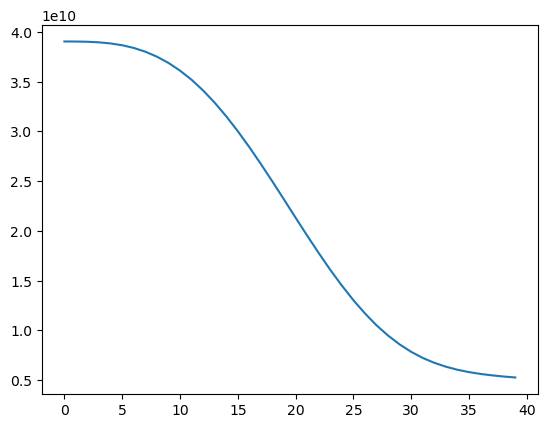

46/46 [==============================] - 0s 886us/step - loss: 578769152.0000 - binary_accuracy: 0.0000e+00
[578769152.0, 0.0]


In [42]:
plt.plot(history.history['loss'])
plt.show()

print(model.evaluate(test_data, test_labels, verbose=1))

46/46 [==============================] - 0s 791us/step


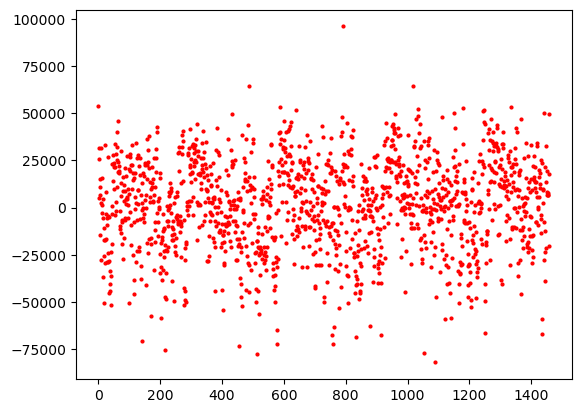

In [43]:
predictions = model.predict(test_data).reshape((1459))
test_labels_array = test_labels.to_numpy().reshape((1459))
ypoints = test_labels_array - predictions

xpoints = np.array(range(len(test_labels)))
plt.plot(xpoints, ypoints, 'ro', markersize=2)
plt.show()